## Analysing Company Data


In [191]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import math

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [71]:
raw = pd.read_csv("company.csv")
raw.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [72]:
company = raw.copy()

In [73]:
company.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [8]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
Company    140 non-null object
Age        130 non-null float64
Salary     124 non-null float64
Place      134 non-null object
Country    148 non-null object
Gender     148 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.0+ KB


In [74]:
company.isna().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [10]:
company.shape

(148, 6)

In [18]:
company.head(10)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


## Handling NaN in Company & Place
Company has missing values. But we cannot replace it with other most occurred company names.
May be these companies are some small companies which the data collector cannot get information about.
So we can gather all non named companies into a single category named "Others".


In [85]:
company['Company'].isna().sum()
company['Place'].isna().sum()

14

In [86]:
company['Company'] = company['Company'].replace(np.NaN,'Others')
company['Place'] = company['Place'].replace(np.NaN,'Others')
company.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [78]:
company.loc[company['Company'] == 'Others']

,Company,Age,Salary,Place,Country,Gender
37,Others,35.0,NaN,Hyderabad,India,0
51,Others,24.0,3000.0,Mumbai,India,0
61,Others,25.0,8943.0,NaN,India,1
64,Others,25.0,6543.0,Noida,India,0
109,Others,33.0,NaN,Calcutta,India,0
123,Others,NaN,3454.0,Calcutta,India,0
133,Others,22.0,8943.0,Chennai,India,0
136,Others,NaN,NaN,Delhi,India,0


In [182]:
company['Company'].unique()

array(['TCS', 'Infosys', 'CTS', 'Others', 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [184]:
company['Company'] = company['Company'].replace('Tata Consultancy Services','TCS')
company['Company'].unique()

array(['TCS', 'Infosys', 'CTS', 'Others', 'Congnizant', 'Infosys Pvt Lmt'],
      dtype=object)

In [185]:
company['Company'] = company['Company'].replace('Infosys Pvt Lmt','Infosys')
company['Company'].unique()

array(['TCS', 'Infosys', 'CTS', 'Others', 'Congnizant'], dtype=object)

In [186]:
company['Company'] = company['Company'].replace('Congnizant','CTS')
company['Company'].unique()

array(['TCS', 'Infosys', 'CTS', 'Others'], dtype=object)

In [187]:
company['Company'].unique()

array(['TCS', 'Infosys', 'CTS', 'Others'], dtype=object)

## Handling NaN and 0 in Age

In [79]:
company.loc[(company['Age'] < 10) | (company['Age'] > 70)]

,Company,Age,Salary,Place,Country,Gender
88,Infosys,0.0,3030.0,Calcutta,India,0
92,TCS,0.0,3045.0,Delhi,India,0
101,CTS,0.0,2034.0,Podicherry,India,0
107,TCS,0.0,9024.0,Chennai,India,1
111,Infosys,0.0,3234.0,Mumbai,India,0
121,CTS,0.0,1234.0,Calcutta,India,0


In [80]:
nonzeroAge = company.loc[company['Age'] > 0].Age.mean(skipna=True)
nonzeroAge
#company['Age'].mean()

31.95967741935484

In [81]:
company['Age'] = company['Age'].replace(0,nonzeroAge)
company.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [82]:
company['Age'].isna().sum()

18

In [83]:
meanAge = company['Age'].mean(skipna=True)
print("Mean Age",meanAge)
company['Age'] = company['Age'].fillna(meanAge)
company['Age'].isna().sum()

Mean Age 31.95967741935483


0

In [87]:
company.isna().sum()


Company     0
Age         0
Salary     24
Place       0
Country     0
Gender      0
dtype: int64

##### Impute Salary column NaN values as we cannot compute anything from those rows if the salary is not known.
##### However to fill Salary NaN values, we cannot replace it with average as different age people may get different salaries.

In [127]:
company.loc[company['Salary'].isna()].head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
10,CTS,23.0,NaN,Mumbai,India,0
12,CTS,45.0,NaN,Chennai,India,0
18,TCS,22.0,NaN,Chennai,India,0


In [141]:
#company['Salary'] = raw['Salary']

In [194]:
company.groupby(by='Age').Salary.count()

Age
17.000000     1
18.000000     1
19.000000     1
20.000000     3
21.000000     8
22.000000    16
23.000000     8
24.000000     4
25.000000     3
26.000000     2
30.000000     2
31.000000     3
31.959677    18
31.959677     6
32.000000     7
33.000000    13
34.000000     8
35.000000     6
36.000000     3
37.000000     2
38.000000     1
40.000000     3
41.000000     5
43.000000     4
44.000000    10
45.000000     4
46.000000     2
50.000000     2
51.000000     1
54.000000     1
Name: Salary, dtype: int64

In [142]:
grp = company.groupby(by='Age').Salary.mean()
grp.head()

Age
17.0    1234.000000
18.0    1234.000000
19.0    1234.000000
20.0    3971.500000
21.0    4765.428571
Name: Salary, dtype: float64

In [147]:
company['Salary'] = company['Salary'].fillna(company.groupby('Age')['Salary'].transform('mean'))
company.head()

,Company,Age,Salary,Place,Country,Gender,SalaryN
0,TCS,20.0,3971.5,Chennai,India,0,3971.5
1,Infosys,30.0,5098.0,Mumbai,India,0,5098.0
2,TCS,35.0,2300.0,Calcutta,India,0,2300.0
3,Infosys,40.0,3000.0,Delhi,India,0,3000.0
4,TCS,23.0,4000.0,Mumbai,India,0,4000.0


In [132]:
company['Salary'].isna().sum()

0

In [149]:
company.isna().sum()
#company.head()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
SalaryN    0
dtype: int64

In [150]:
company.describe()

,Age,Salary,Gender,SalaryN
count,148.000000,148.000000,148.000000,148.000000
mean,31.959677,5347.514875,0.222973,5347.514875
std,8.263846,2394.004763,0.417654,2394.004763
min,17.000000,1089.000000,0.000000,1089.000000
25%,23.000000,3149.250000,0.000000,3149.250000
50%,31.959677,5034.000000,0.000000,5034.000000
75%,36.000000,7084.000000,0.000000,7084.000000
max,54.000000,9876.000000,1.000000,9876.000000


In [151]:
def find_outliers(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3-q1 
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < lw) | (x > uw)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

## find outliers in each columns

In [164]:
Salary_index, Salary_value = find_outliers(company['Salary'])
print(Salary_index)
print(Salary_value)
"""q1 = company['Salary'].quantile(.25)
q3 = company['Salary'].quantile(.75)
iqr = q3-q1 
lw = q1 - 1.5*iqr
uw = q3 + 1.5*iqr

print(lw)
print(uw)"""

[]
[]


"q1 = company['Salary'].quantile(.25)\nq3 = company['Salary'].quantile(.75)\niqr = q3-q1 \nlw = q1 - 1.5*iqr\nuw = q3 + 1.5*iqr\n\nprint(lw)\nprint(uw)"

In [165]:
Age_index, Age_value = find_outliers(company['Age'])
print(Age_index)
print(Age_value)

[]
[]


## Visualization

## Age & Salary

Text(0, 0.5, 'Salary')

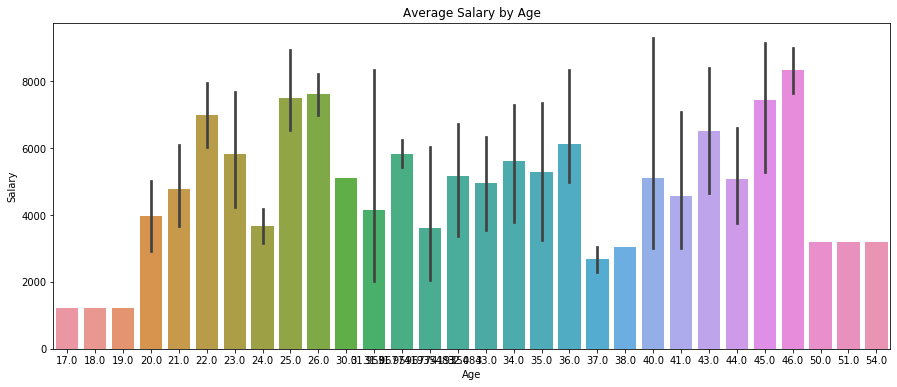

In [170]:
plt.figure(figsize = (15,6))
plt.title("Average Salary by Age")

#defining bar plot here
sns.barplot(x = company['Age'],  y = company['Salary'])

#Adding labels
plt.ylabel("Salary")

### From the above bar chart, Salary is not related to Age.
### Even the highest aged people are getting less salary and younger people are getting more salary than elders.

## Correlation


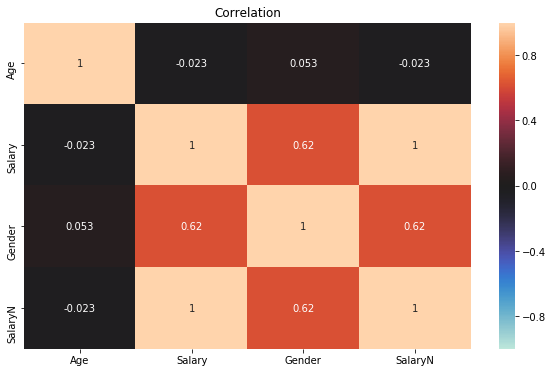

In [172]:
plt.figure(figsize = (10,6))
plt.title("Correlation")


corr = company.corr()
#defining bar plot here
ax = sns.heatmap(corr,vmin = -1, vmax = 1,center = 0,annot = True)

### As we can see in the above correlation matrix, Age & Salary are less related than Gender and salary
### So, there is no significant relation between Age and Salary

## Gender & Salary

Text(0, 0.5, 'Salary')

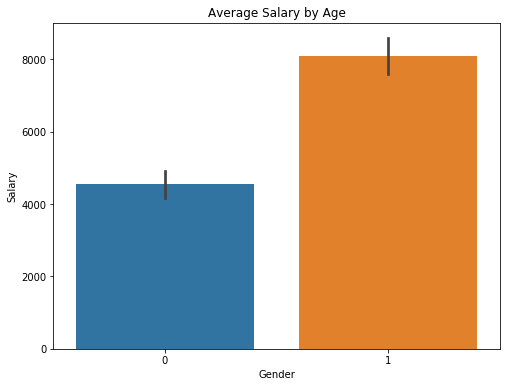

In [174]:
plt.figure(figsize = (8,6))
plt.title("Average Salary by Age")

#defining bar plot here
sns.barplot(x = company['Gender'],  y = company['Salary'])

#Adding labels
plt.ylabel("Salary")

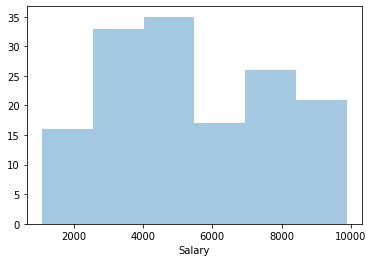

In [177]:
sns.distplot(a = company['Salary'],kde = False)

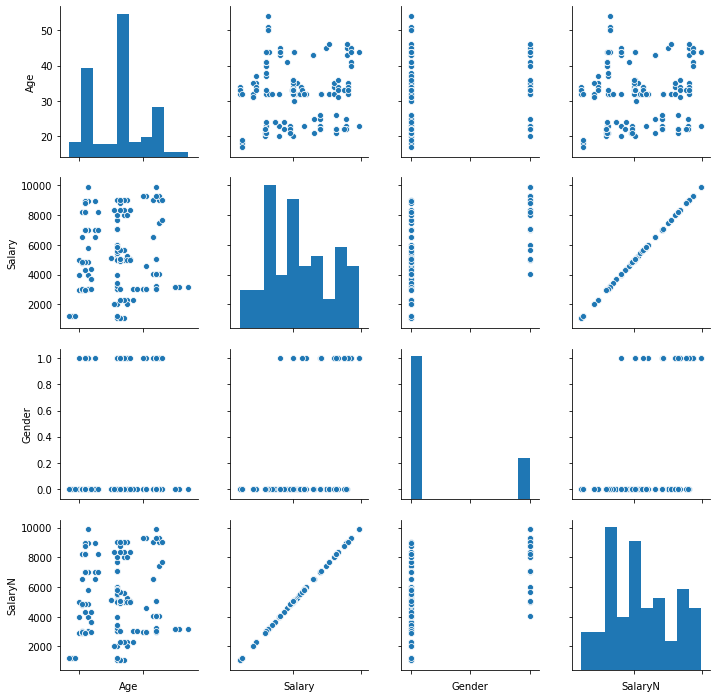

In [176]:
g = sns.pairplot(company)
g.set(xticklabels = [])

In [178]:
company.head()

,Company,Age,Salary,Place,Country,Gender,SalaryN
0,TCS,20.0,3971.5,Chennai,India,0,3971.5
1,Infosys,30.0,5098.0,Mumbai,India,0,5098.0
2,TCS,35.0,2300.0,Calcutta,India,0,2300.0
3,Infosys,40.0,3000.0,Delhi,India,0,3000.0
4,TCS,23.0,4000.0,Mumbai,India,0,4000.0


Text(0, 0.5, 'Salary')

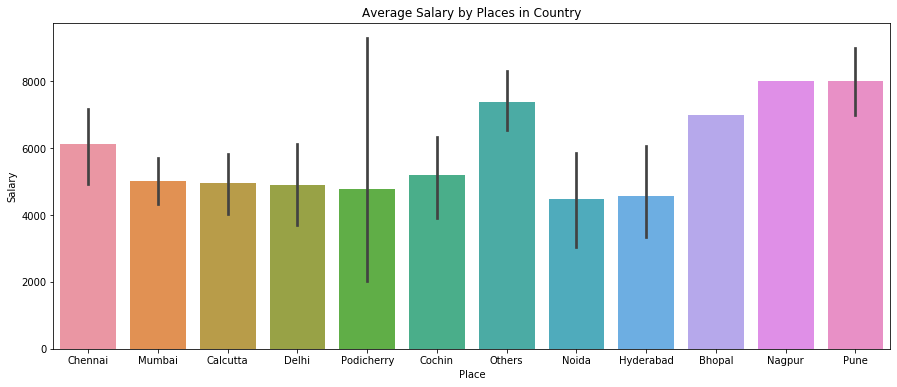

In [180]:
plt.figure(figsize = (15,6))
plt.title("Average Salary by Places in Country")

#defining bar plot here
sns.barplot(x = company['Place'],  y = company['Salary'])

#Adding labels
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

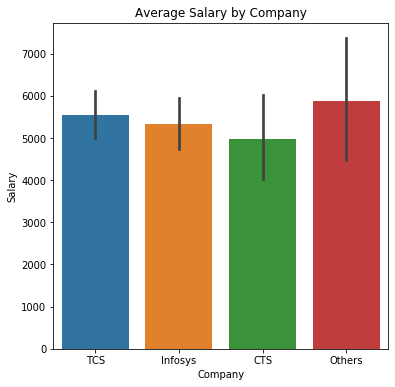

In [189]:
plt.figure(figsize = (6,6))
plt.title("Average Salary by Company")

#defining bar plot here
sns.barplot(x = company['Company'],  y = company['Salary'])

#Adding labels
plt.ylabel("Salary")